<div style="padding: 150px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://ars.els-cdn.com/content/image/1-s2.0-S0306457319307988-gr1.jpg)"><b><span style='color:green;font-size:250%;font-weight:500'>Hero</span><span style='color:#8c0906;font-size:250%;font-weight:500'> Victim</span><span style='color:yellow;font-size:350%;font-weight:500'> Villain </span></b> </div>


## Political Memes OCR-Based Named Entity Recognition for US Election Analysis
### Leveraging Deep Learning and OCR Data to Extract Entity Information from Political Memes and Analyze US Election Dynamics
We have the OCR data of the memes which can be categorized into two groups, covid related memes and US politics related memes. <br>Their are two types of data available images and Text data which have OCR text from the memes and tags. So lets go ahead and explore the data

# <span style="color:#E888BB; font-size: 1%;">1 | IMPORTING LIBRARIES AND EXPLORING THE DATA</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>1 | EXPLORING THE DATA</span></b> </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
path = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path.append(os.path.join(dirname, filename))

/kaggle/input/text-data-ocr/validation_data.csv
/kaggle/input/text-data-ocr/text_with_ocr.csv
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_111.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_5.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_7.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_30.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_63.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_103.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_179.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/covidMemes/covid_memes_193.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/usPoliticsMemes/memes_44.png
/kaggle/input/text-data-ocr/SampleImagesData/SampleImagesData/usPoliticsMemes

> ## Train data

In [4]:
train_data=pd.read_csv('/kaggle/input/text-data-ocr/text_with_ocr.csv')
train_data

,OCR,image,hero,villain,victim,other
0,Bernie or Elizabeth? Be informed. Compare them...,covid_memes_18.png,NaN,NaN,NaN,"['bernie sanders', 'elizabeth warren']"
1,Extending the Brexit deadline until October 31...,covid_memes_19.png,NaN,['uk government'],NaN,NaN
2,kwai gkwa 0964 #nnevvy applause to Thais from ...,covid_memes_252.png,['thais'],NaN,NaN,['hong kong']
3,"So, I order this face mask to protect against ...",covid_memes_255.png,NaN,['china'],NaN,"['face mask', 'made in china', 'coronavirus']"
4,best candidate for JA 2020 joe biden Kamala ha...,covid_memes_20.png,['joe biden'],NaN,NaN,"['bernie sanders', 'kamala harris', 'tiktok']"
...,...,...,...,...,...,...
5547,Trump could shoot someone on the Senate floor ...,memes_5039.png,NaN,['donald trump'],NaN,"['senate floor', 'republican']"
5548,MANY PEOPLE ASK ME WHY ALL MY SCHOOL RECORDS A...,memes_2635.png,NaN,NaN,NaN,"['school', 'university', 'joe biden']"
5549,my bes friend my mother consclence my therapis...,memes_1384.png,NaN,NaN,NaN,"['msnbc', 'bernie sanders', 'democratic party'..."
5550,THE N-WORD PASS Signed and approved by Beak Ob...,memes_944.png,NaN,NaN,NaN,['barack obama']


> ## Validation Data

In [5]:
val_data=pd.read_csv('/kaggle/input/text-data-ocr/validation_data.csv')
val_data

,OCR,image,hero,villain,victim,other
0,Herman Caino OTHEHermancain Masks will not be ...,covid_memes_2457.png,NaN,['herman cain'],NaN,"['donald trump', 'covid', 'coronavirus', 'mask..."
1,Let's go to China to save them from I'm the ma...,covid_memes_257.png,NaN,NaN,NaN,"['batman', 'china', 'coronavirus']"
2,WHO WOULD WIN? Thanos One hantavirus boy Sorry...,covid_memes_280.png,NaN,NaN,NaN,"['hantavirus', 'thanos', 'hanta virus', 'thano..."
3,Dotors: *Working 24x7 relentlessly to save liv...,covid_memes_459.png,['goicho saib'],"['goan aunties', 'goan uncles']",['doctors'],"['goencho saib', 'goan people', 'coronavirus',..."
4,Occupy Danocrats a at 12 DREAKNG: Barack Cbari...,covid_memes_622.png,['joe biden'],NaN,NaN,['barack obama']
...,...,...,...,...,...,...
645,"Totaly Agree ""The Republican Party is not a po...",memes_5083.png,NaN,['republican party'],NaN,"['richard belzer', 'political party']"
646,"Thank You, Lord ESUS, PRESIDENT TRUMP ""Never u...",memes_4641.png,NaN,"['donald trump', 'people']",NaN,"['jesus', 'george carlin', 'trump supporters']"
647,REPUBLICANS DEMOCRATS ALWAYS BLAME DEMOCRATS |...,memes_3481.png,NaN,"['republican', 'democrat', 'political puppets']",NaN,"['republicans', 'democrats']"
648,TA BANANA REP. SRUN BY AN ORA,memes_4920.png,NaN,NaN,NaN,"['donald trump', 'banana', 'orange']"


## <span style="color:#E888BB; font-size: 1%;">1 | IMPORTING LIBRARIES AND EXPLORING THE DATA</span>
<div style="padding: 20px;color:white;margin:10;font-size:150%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.pinimg.com/736x/1b/06/b8/1b06b87d5f493f93130ffcccdac578bf.jpg)"><b><span style='color:white'>Sample Memes</span></b> </div>

There are both types of memes that for which OCR is present in the dataset<br>
Covid related memes and US Politics related memes<br>So lets first take a look at some sample images

In [6]:
# Creating DataFrame containing Image name and its path
path_meme = []
for paths in path[2:10]:
    path_meme.append(paths[-19:-4])
    
for paths in path[10:]:
    path_meme.append('usPolitics_'+paths[-12:-4])
    
df_meme = pd.DataFrame(data = path_meme, columns=['Meme_type'])
df_path = pd.DataFrame(data = path[2:], columns=['Path'])
df = pd.concat([df_meme,df_path],axis =1)
df.head()

,Meme_type,Path
0,covid_memes_111,/kaggle/input/text-data-ocr/SampleImagesData/S...
1,s/covid_memes_5,/kaggle/input/text-data-ocr/SampleImagesData/S...
2,s/covid_memes_7,/kaggle/input/text-data-ocr/SampleImagesData/S...
3,/covid_memes_30,/kaggle/input/text-data-ocr/SampleImagesData/S...
4,/covid_memes_63,/kaggle/input/text-data-ocr/SampleImagesData/S...


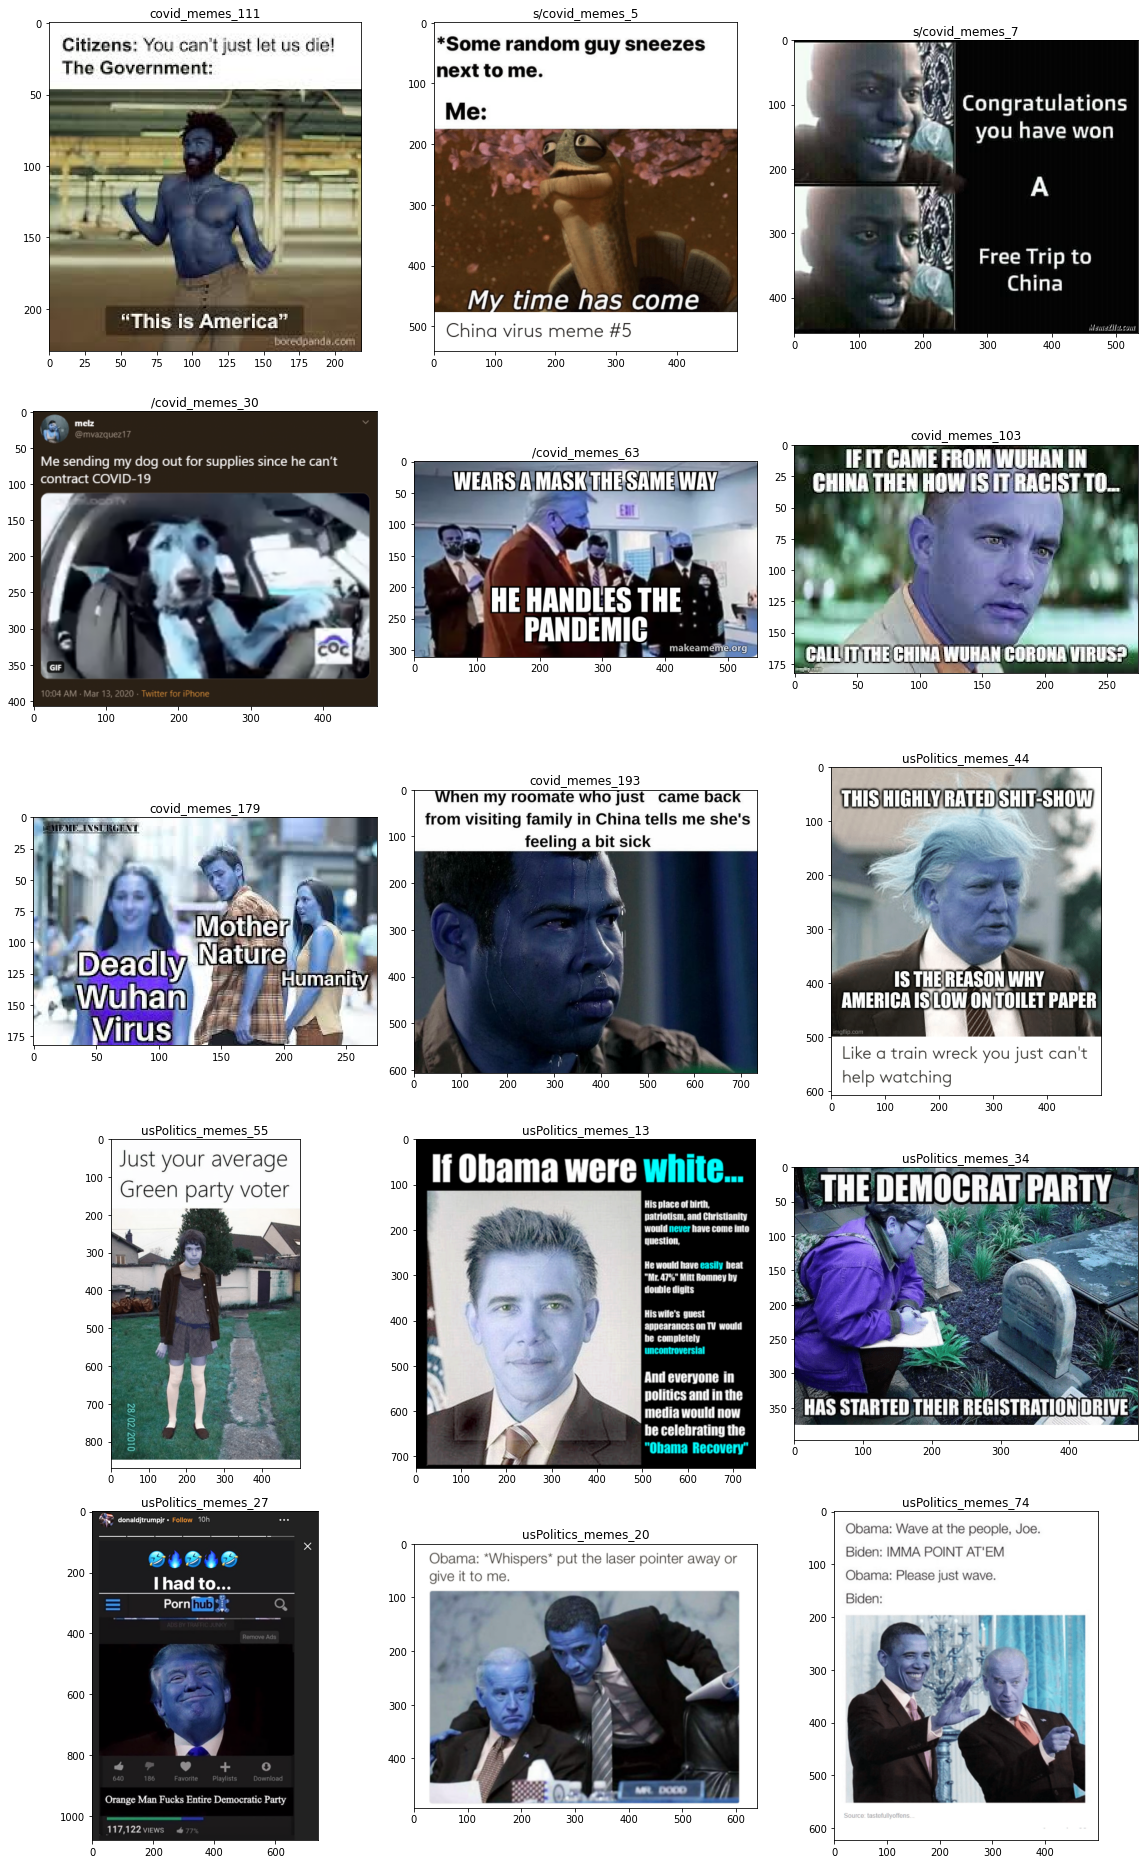

In [7]:
# Basic visualizations: Visualize the images (covid and US politics memes) in the dataset
import cv2
fig, ax = plt.subplots(5,3, figsize=(16,26))
count = 0
i = 0
for x in range(5):
    ax[count][0].title.set_text(str(df['Meme_type'][i]))
    ax[count][0].imshow(cv2.imread(df.Path[i]))
    ax[count][1].title.set_text(str(df['Meme_type'][i+1]))
    ax[count][1].imshow(cv2.imread(df.Path[i+1]))
    ax[count][2].title.set_text(str(df['Meme_type'][i+2]))
    ax[count][2].imshow(cv2.imread(df.Path[i+2]))
    i=i+3
    count += 1
fig.tight_layout()

As first seeing the meme we can see that here someone being critisized or praised in fun way<br>But it is noticed that its hard to labled the hero, villain, victim just by seeing the image, you should know the context behind it<br>For example, China is being mentioned in covid related memes because Covid was spread from China, one should know the context behind the meme to labelled China as a villain in the meme<br>But already we have labelled data with hero, villain, victim and other tag along with the OCR of the images as you can see above <br>So lets continue with the textual data

# <span style="color:#E888BB; font-size: 1%;">2 | Data Cleaning</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>2 | Data Cleaning</span></b> </div>

In [8]:
train_data

,OCR,image,hero,villain,victim,other
0,Bernie or Elizabeth? Be informed. Compare them...,covid_memes_18.png,NaN,NaN,NaN,"['bernie sanders', 'elizabeth warren']"
1,Extending the Brexit deadline until October 31...,covid_memes_19.png,NaN,['uk government'],NaN,NaN
2,kwai gkwa 0964 #nnevvy applause to Thais from ...,covid_memes_252.png,['thais'],NaN,NaN,['hong kong']
3,"So, I order this face mask to protect against ...",covid_memes_255.png,NaN,['china'],NaN,"['face mask', 'made in china', 'coronavirus']"
4,best candidate for JA 2020 joe biden Kamala ha...,covid_memes_20.png,['joe biden'],NaN,NaN,"['bernie sanders', 'kamala harris', 'tiktok']"
...,...,...,...,...,...,...
5547,Trump could shoot someone on the Senate floor ...,memes_5039.png,NaN,['donald trump'],NaN,"['senate floor', 'republican']"
5548,MANY PEOPLE ASK ME WHY ALL MY SCHOOL RECORDS A...,memes_2635.png,NaN,NaN,NaN,"['school', 'university', 'joe biden']"
5549,my bes friend my mother consclence my therapis...,memes_1384.png,NaN,NaN,NaN,"['msnbc', 'bernie sanders', 'democratic party'..."
5550,THE N-WORD PASS Signed and approved by Beak Ob...,memes_944.png,NaN,NaN,NaN,['barack obama']


Here we have covid and US politics related memes and their OCR<br>It is observed that the tags given for covid memes are indirect i.e. not present in the OCR like China being tagged instead Wuhan were present in OCR text<br>Hence we gonna deal only with the politics related data as of now

In [9]:
# Till 2700 there are covid meme related data in the train data and till 300 in the validation data, hence include data after that
train_data = train_data[2700:]
val_data = val_data[300:]

## Remove unnecessary feature columns

In [ ]:
for df in [train_data, val_data]:
    df.drop(['image','other'],axis=1,inplace=True)

In [11]:
train_data.describe().transpose()

,count,unique,top,freq
OCR,2850,2779,WANTS TO CONTROL THE COUNTRY CAN'T EVEN CONTRO...,5
hero,230,97,['donald trump'],34
villain,1308,420,['donald trump'],275
victim,441,209,['donald trump'],34


# Removing Stopwords and Punctuations

In [ ]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string


def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

for df in [train_data,val_data]:
    df['OCR'] = df['OCR'].astype(str)
    df['OCR'] = df['OCR'].apply(remove_punctuations)
    df['OCR'] = df['OCR'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## OCR text count visualization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


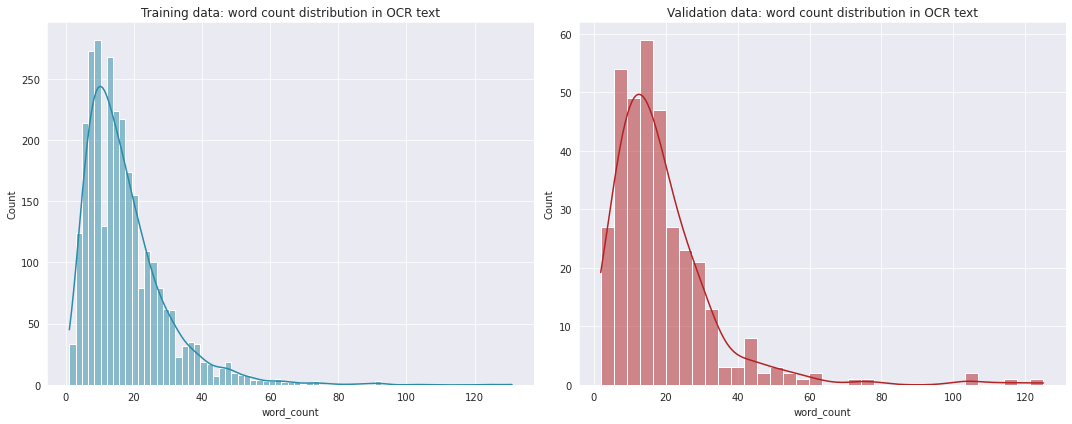

In [28]:
for df in [train_data,val_data]:
    df['word_count'] = df['OCR'].str.split().str.len()

sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x=train_data['word_count'],color='#288BA8',kde=True,lw=1)
plt.title("Training data: word count distribution in OCR text");

plt.subplot(1,2,2)
sns.histplot(x=val_data['word_count'],color='#B22222',kde=True,lw=1)
plt.title("Validation data: word count distribution in OCR text");
plt.tight_layout()


So here we gonna include the data with OCR text word count less than 75

In [29]:
train_data = train_data[train_data['word_count']<75]
train_data = train_data.reset_index()
train_data.drop('index',axis=1,inplace=True)

val_data = val_data[val_data['word_count']<75]
val_data = val_data.reset_index()
val_data.drop('index',axis=1,inplace=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OCR         2840 non-null   object
 1   hero        228 non-null    object
 2   villain     1297 non-null   object
 3   victim      438 non-null    object
 4   word_count  2840 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 111.1+ KB


In [31]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OCR         345 non-null    object
 1   hero        27 non-null     object
 2   villain     163 non-null    object
 3   victim      57 non-null     object
 4   word_count  345 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.6+ KB


## Converting tag to simple strings

In [32]:
# For converting tag to simple strings
def listToString(s): 
    # initialize an empty string
    str1 = ""
    # traverse in the string
    for ele in s:
        str1 += ele
    # return string
    return str1

def tag_to_string(df):
    list1=[]
    for i in range(len(df)):
        df['hero']=df['hero'].astype(str)
        df['villain']=df['villain'].astype(str)
        df['victim']=df['victim'].astype(str)
        for x in df['OCR'].iloc[i].lower().split():
            if x in listToString(df['hero'].iloc[i]):
                list1.append([(i+1),x,'hero'])
            elif x in listToString(df['villain'].iloc[i]):
                       list1.append([(i+1),x,'villain'])
            elif x in listToString(df['victim'].iloc[i]):
                       list1.append([(i+1),x,'victim'])
            else:
                list1.append([(i+1),x,np.NaN])
    
    y_df=pd.DataFrame(list1)
    y_df.columns = ['sentence_idx', 'word', 'tag']
    y_df['sentence_idx']=y_df['sentence_idx'].astype(float)
    
    return y_df

train_df = tag_to_string(train_data)
val_df = tag_to_string(val_data)

In [33]:
train_data

,OCR,hero,villain,victim,word_count
0,Trump Does always stand like Obama Hes upset r...,nan,nan,nan,18
1,WELCOME TO THE REPUBLICAN PARTY WHERE THE POIN...,nan,['republican party'],"['women', 'poor', 'minorities']",20
2,NOW THAT RUSSIA COLLUSION IS PROVEN LIE WHEN D...,nan,"['bill clinton', 'barack obama', 'hillary clin...",nan,14
3,BidenI changed WiFi password ILoveMexicans Tru...,nan,['donald trump'],['mexicans'],17
4,The power create new world hopes dreams hands ...,nan,nan,nan,10
...,...,...,...,...,...
2835,Trump could shoot someone Senate floor still a...,nan,['donald trump'],nan,15
2836,MANY PEOPLE ASK ME WHY ALL MY SCHOOL RECORDS A...,nan,nan,nan,36
2837,bes friend mother consclence therapist Ciny b ...,nan,nan,nan,17
2838,THE NWORD PASS Signed approved Beak Obana,nan,nan,nan,7


In [36]:
train_df['tag'].value_counts()

villain    2551
hero        932
victim      791
Name: tag, dtype: int64

In [37]:
val_df['tag'].value_counts()

villain    301
victim     110
hero       110
Name: tag, dtype: int64

# <span style="color:#E888BB; font-size: 1%;">3 | Data Preprocessing</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>3 | Data Preprocessing</span></b> </div>

In [40]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [41]:
getter_train = SentenceGetter(train_df)
getter_val = SentenceGetter(val_df)

In [42]:
train_sentences = getter_train.sentences
val_sentences = getter_val.sentences

In [43]:
print(train_sentences[5])

[('democratic', 'villain'), ('party', 'hero'), ('republican', 'villain'), ('party', 'hero'), ('gamecube', nan), ('shrek', 'hero'), ('super', 'hero'), ('party', 'hero'), ('otdk', nan)]


In [44]:
print(val_sentences[4])

[('maria', nan), ('butina', nan), ('used', nan), ('sex', nan), ('to', nan), ('infiltrate', nan), ('the', nan), ('nra', nan), ('the', nan), ('republican', nan), ('party', nan), ('so', nan), ('there', nan), ('may', nan), ('be', nan), ('sex', nan), ('tapes', nan), ('of', nan), ('mitch', 'villain'), ('mcconnell', 'villain')]


In [45]:
maxlen = max([len(s) for s in val_sentences])
print ('Maximum sequence length in validation data:', maxlen)

maxlen = max([len(s) for s in train_sentences])
print ('Maximum sequence length in train data:', maxlen)

Maximum sequence length in validation data: 74
Maximum sequence length in train data: 74


In [46]:
train_df['word'].nunique()

11189

In [47]:
val_df['word'].nunique()

2679

In [50]:
df_for_words=pd.concat([train_df,val_df],axis=0)
df_for_words

,sentence_idx,word,tag
0,1.0,trump,NaN
1,1.0,does,NaN
2,1.0,always,NaN
3,1.0,stand,NaN
4,1.0,like,NaN
...,...,...,...
6138,345.0,destroy,NaN
6139,345.0,the,NaN
6140,345.0,economy,victim
6141,345.0,coronavirus,villain


In [54]:
words = list(set(df_for_words['word'].values)) 
words.append(np.NaN)

n_words = len(words)
n_words

12243

In [55]:
tags = list(set(train_df["tag"].values))
n_tags = len(tags)
n_tags

4

In [56]:
tags

[nan, 'victim', 'villain', 'hero']

## Converting words to numbers and numbers to words

In [57]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [58]:
print(str(word2idx)[:204])

{'lpinorg': 0, 'green': 1, 'pottawatomie': 2, 'yesterday': 3, 'adolf': 4, 'grammy': 5, 'indeed': 6, 'terrify': 7, 'i': 8, 'arvin': 9, 'fturs': 10, 'bride': 11, 'bumped': 12, 'anticop': 13, 'import': 14, '


In [59]:
word2idx[np.NaN]

12242

In [60]:
tags

[nan, 'victim', 'villain', 'hero']

In [61]:
tag2idx

{nan: 0, 'victim': 1, 'villain': 2, 'hero': 3}

## Preprocessing for LSTM model input

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = [[word2idx[w[0]] for w in s] for s in train_sentences]
X_test = [[word2idx[w[0]] for w in s] for s in val_sentences]

In [65]:
X_train = pad_sequences(maxlen=74, sequences=X_train, padding="post",value=n_words - 1) # post padding
X_test = pad_sequences(maxlen=74, sequences=X_test, padding="post",value=n_words - 1) # post padding

In [66]:
X_train

array([[ 2115,  9394, 10805, ..., 12242, 12242, 12242],
       [ 4821,  1287,  1258, ..., 12242, 12242, 12242],
       [11407,  4368,  3424, ..., 12242, 12242, 12242],
       ...,
       [ 9613,  2323,  5013, ..., 12242, 12242, 12242],
       [ 1258,   884,  8672, ..., 12242, 12242, 12242],
       [ 9496, 11507,  4079, ..., 12242, 12242, 12242]], dtype=int32)

In [67]:
X_test

array([[ 1258,  6274,  1129, ..., 12242, 12242, 12242],
       [ 4221,  3242,    77, ..., 12242, 12242, 12242],
       [ 1258,  4687,  3489, ..., 12242, 12242, 12242],
       ...,
       [ 7954,   214, 10805, ..., 12242, 12242, 12242],
       [ 4412,  9880,  3138, ..., 12242, 12242, 12242],
       [ 1593, 10866,  1863, ..., 12242, 12242, 12242]], dtype=int32)

In [68]:
(X_train).shape

(2840, 74)

In [69]:
(X_test).shape

(345, 74)

In [70]:
y_train = [[tag2idx[w[1]] for w in s] for s in train_sentences]
y_test = [[tag2idx[w[1]] for w in s] for s in val_sentences]

y_train = pad_sequences(maxlen=74, sequences=y_train, padding="post", value=0)
y_test = pad_sequences(maxlen=74, sequences=y_test, padding="post", value=0)

In [71]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0]], dtype=int32)

In [72]:
y_train[1]

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [73]:
(y_train).shape

(2840, 74)

In [74]:
(y_test).shape

(345, 74)

In [75]:
from tensorflow.keras.utils import to_categorical
y_train = [to_categorical(i, num_classes=n_tags) for i in y_train]
y_test = [to_categorical(i, num_classes=n_tags) for i in y_test]

# <span style="color:#E888BB; font-size: 1%;">4 | Bi-LSTM model</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>4 | Bi-LSTM model</span></b> </div>

In [77]:
from tensorflow.python.keras.models import Model,Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [78]:
X_train.shape

(2840, 74)

In [79]:
X_test.shape

(345, 74)

In [80]:
input = Input(shape=(74,))
model = Embedding(input_dim=n_words, output_dim=74, input_length=74)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [81]:
model = Model(input, out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [82]:
model.fit(X_train, np.array(y_train), batch_size=32, epochs=7, validation_split=0.2, verbose=1)

Epoch 1/7
71/71 [==============================] - 31s 343ms/step - loss: 0.4376 - accuracy: 0.9152 - val_loss: 0.0956 - val_accuracy: 0.9780
Epoch 2/7
71/71 [==============================] - 23s 319ms/step - loss: 0.0837 - accuracy: 0.9802 - val_loss: 0.0889 - val_accuracy: 0.9779
Epoch 3/7
71/71 [==============================] - 22s 314ms/step - loss: 0.0719 - accuracy: 0.9810 - val_loss: 0.0867 - val_accuracy: 0.9780
Epoch 4/7
71/71 [==============================] - 23s 319ms/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0788 - val_accuracy: 0.9785
Epoch 5/7
71/71 [==============================] - 23s 320ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.0738 - val_accuracy: 0.9809
Epoch 6/7
71/71 [==============================] - 22s 315ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.0779 - val_accuracy: 0.9811
Epoch 7/7
71/71 [==============================] - 23s 316ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0847 - val_accuracy: 0.9813


<AxesSubplot:>

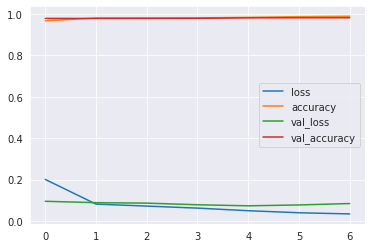

In [83]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [84]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 74)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 74, 74)            905982    
_________________________________________________________________
dropout (Dropout)            (None, 74, 74)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 74, 200)           140000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 74, 200)           240800    
_________________________________________________________________
time_distributed (TimeDistri (None, 74, 4)             804   

In [85]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save("BiLSTM_model.h5")
print("Saved model to disk")

Saved model to disk


In [86]:
# later_model = load_model('/kaggle/working/BiLSTM_model.h5')
# later_model

# <span style="color:#E888BB; font-size: 1%;">5 | Predictions : Word to word</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>5 | Predictions : Word to word</span></b> </div>

In [ ]:
predictions = []
for i in range(0,len(X_test)):
    p = model.predict(np.array([X_test[i]]))
    p = np.argmax(p, axis=-1)
    print("{:14} ({:5}): {}".format("Word", "True", "Pred"))
    for w,pred in zip(X_test[i],p[0]):
        print("{}: {}".format(words[w],tags[pred]))
        predictions.append([words[w],tags[pred]])

In [89]:
len(predictions)

25530

In [90]:
pred_df = pd.DataFrame(predictions)
pred_df.columns=['Word','Tag']
pred_df['Tag'] = pred_df['Tag'].replace(np.NaN,'O')
pred_df = pred_df.dropna()
pred_df = pred_df.reset_index()
pred_df

,index,Word,Tag
0,0,the,O
1,1,time,O
2,2,is,O
3,3,long,O
4,4,overdue,O
...,...,...,...
6138,25464,destroy,O
6139,25465,the,O
6140,25466,economy,O
6141,25467,coronavirus,O


In [91]:
pred_df['Tag'].value_counts()

O          5927
villain     142
hero         74
Name: Tag, dtype: int64

In [ ]:
# For getting original test data
test=[]
for i in range(0,len(y_test)):
    p = y_test[i]
    p = np.argmax(p, axis=-1)
    p = np.array([p])
    print("{:14} ({:5}): {}".format("Word", "True", "Pred"))
    for w,pred in zip(X_test[i],p[0]):
        print("{}: {}".format(words[w],tags[pred]))
        test.append([words[w],tags[pred]])

In [93]:
test =pd.DataFrame(test)
test.columns=['Word','Tag']
test = test[test.Word != 'ENDPAD']
test['Tag']=test['Tag'].replace(np.NaN,'O')
test=test.dropna()
test=test.reset_index()
test

,index,Word,Tag
0,0,the,O
1,1,time,O
2,2,is,O
3,3,long,O
4,4,overdue,O
...,...,...,...
6138,25464,destroy,O
6139,25465,the,O
6140,25466,economy,victim
6141,25467,coronavirus,villain


In [95]:
from sklearn.metrics import classification_report
print(classification_report(test['Tag'], pred_df['Tag']))

              precision    recall  f1-score   support

           O       0.94      0.99      0.96      5622
        hero       0.85      0.57      0.68       110
      victim       0.00      0.00      0.00       110
     villain       0.35      0.16      0.22       301

    accuracy                           0.92      6143
   macro avg       0.53      0.43      0.47      6143
weighted avg       0.89      0.92      0.90      6143



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----

# <span style="color:#E888BB; font-size: 1%;">6 | Predictions : Whole Sentence</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://th.bing.com/th/id/R.a5647d4af9116cdc319f7ef25edf7c94?rik=VaEPyNbiZevq%2bQ&riu=http%3a%2f%2fgetwallpapers.com%2fwallpaper%2ffull%2f2%2fa%2f0%2f1009832-royal-blue-backgrounds-3840x2160-for-windows-7.jpg&ehk=Bo8%2fHkD1%2f6g%2b2Yc%2fQmrFm6aR7%2fUEVHd1CENYFOfITwg%3d&risl=&pid=ImgRaw&r=0)"><b><span style='color:white'>6 | Predictions : Whole Sentence</span></b> </div>

In [96]:
test

,index,Word,Tag
0,0,the,O
1,1,time,O
2,2,is,O
3,3,long,O
4,4,overdue,O
...,...,...,...
6138,25464,destroy,O
6139,25465,the,O
6140,25466,economy,victim
6141,25467,coronavirus,villain


In [98]:
pred_df

,index,Word,Tag
0,0,the,O
1,1,time,O
2,2,is,O
3,3,long,O
4,4,overdue,O
...,...,...,...
6138,25464,destroy,O
6139,25465,the,O
6140,25466,economy,O
6141,25467,coronavirus,O


In [99]:
val_df

,sentence_idx,word,tag
0,1.0,the,NaN
1,1.0,time,NaN
2,1.0,is,NaN
3,1.0,long,NaN
4,1.0,overdue,NaN
...,...,...,...
6138,345.0,destroy,NaN
6139,345.0,the,NaN
6140,345.0,economy,victim
6141,345.0,coronavirus,villain


In [100]:
pred_df['sentence_idx']=val_df['sentence_idx'].copy()
test['sentence_idx']=val_df['sentence_idx'].copy()

In [102]:
pred_df.drop('index',axis=1,inplace=True)
test.drop('index',axis=1,inplace=True)
test

,Word,Tag,sentence_idx
0,the,O,1.0
1,time,O,1.0
2,is,O,1.0
3,long,O,1.0
4,overdue,O,1.0
...,...,...,...
6138,destroy,O,345.0
6139,the,O,345.0
6140,economy,victim,345.0
6141,coronavirus,villain,345.0


In [103]:
data=pred_df.copy()
data.columns=['Word','Tag','Sentence #']

Tdata=test.copy()
Tdata.columns=['Word','Tag','Sentence #']
Tdata

,Word,Tag,Sentence #
0,the,O,1.0
1,time,O,1.0
2,is,O,1.0
3,long,O,1.0
4,overdue,O,1.0
...,...,...,...
6138,destroy,O,345.0
6139,the,O,345.0
6140,economy,victim,345.0
6141,coronavirus,villain,345.0


In [104]:
data

,Word,Tag,Sentence #
0,the,O,1.0
1,time,O,1.0
2,is,O,1.0
3,long,O,1.0
4,overdue,O,1.0
...,...,...,...
6138,destroy,O,345.0
6139,the,O,345.0
6140,economy,O,345.0
6141,coronavirus,O,345.0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Word        6143 non-null   object 
 1   Tag         6143 non-null   object 
 2   Sentence #  6143 non-null   float64
dtypes: float64(1), object(2)
memory usage: 144.1+ KB


In [ ]:
# Predict Data
data_dict = []
all_sen_data = []
for sn in range(1,346):
    x=' '
    se_data = data[data['Sentence #'] == sn]
    sentence = x.join(list(se_data['Word']))
    all_sen_data.append(sentence)
    sen_tags = list(se_data['Tag'])
    all_sen_data.append(sen_tags)

In [109]:
len(all_sen_data)

690

In [110]:
# Predict Data
Tdata_dict = []
Tall_sen_data = []
for sn in range(1,346):
    x=' '
    se_data = Tdata[Tdata['Sentence #']  == sn]
    sentence = x.join(list(se_data['Word']))
    Tall_sen_data.append(sentence)
    sen_tags = list(se_data['Tag'])
    Tall_sen_data.append(sen_tags)

In [113]:
len(Tall_sen_data)

690

In [114]:
# Predicted Data
sen = []
tags = []
for i in range(0, 690, 2):
    sen.append(all_sen_data[i])

for i in range(1, 690, 2):
    tags.append(all_sen_data[i])

In [115]:
# Test Data
Tsen = []
Ttags = []
for i in range(0, 690, 2):
    Tsen.append(Tall_sen_data[i])

for i in range(1, 690, 2):
    Ttags.append(Tall_sen_data[i])

In [116]:
df = pd.DataFrame(list(zip(sen, tags)),
               columns =['sen', 'tags'])
df

,sen,tags
0,the time is long overdue for ridding the repub...,"[O, O, O, O, O, O, O, O, villain, villain, O, ..."
1,election day may the vote be ever in your favo...,"[O, O, O, O, O, O, O, O, O, O, O]"
2,the trumps killing republican party one lie ti...,"[O, O, O, villain, villain, O, O, O, villain, ..."
3,the same folks thats countin them rona cases a...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,maria butina used sex to infiltrate the nra th...,"[O, O, O, O, O, O, O, O, O, villain, villain, ..."
...,...,...
340,totaly agree the republican party political pa...,"[O, O, O, villain, villain, O, O, O, O, O, O, ..."
341,thank you lord esus president trump never unde...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
342,republicans democrats always blame democrats a...,"[villain, villain, O, O, villain, O, O, villai..."
343,ta banana rep srun by an ora,"[O, O, O, O, O, hero, O]"


In [117]:
Tdf = pd.DataFrame(list(zip(Tsen, Ttags)),
               columns =['sen', 'tags'])
Tdf

,sen,tags
0,the time is long overdue for ridding the repub...,"[O, O, O, O, O, O, O, O, villain, villain, O, ..."
1,election day may the vote be ever in your favo...,"[O, O, O, O, O, O, O, O, O, O, O]"
2,the trumps killing republican party one lie ti...,"[O, villain, O, victim, victim, O, O, O, O, vi..."
3,the same folks thats countin them rona cases a...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,maria butina used sex to infiltrate the nra th...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
...,...,...
340,totaly agree the republican party political pa...,"[O, O, O, villain, villain, O, villain, O, O, ..."
341,thank you lord esus president trump never unde...,"[O, O, O, O, O, villain, O, O, O, O, villain, ..."
342,republicans democrats always blame democrats a...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
343,ta banana rep srun by an ora,"[O, O, O, O, O, hero, O]"


In [120]:
def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

In [121]:
df['tags']=df['tags'].apply(listToString)
Tdf['tags']=Tdf['tags'].apply(listToString)

In [122]:
# Data with predicted matches with the original
Tdf[Tdf['tags'] == df['tags']]

,sen,tags
0,the time is long overdue for ridding the repub...,OOOOOOOOvillainvillainOOOOOOOOOOOOO
1,election day may the vote be ever in your favo...,OOOOOOOOOOO
3,the same folks thats countin them rona cases a...,OOOOOOOOOOOOOOO
5,cmon maam avaia 30 20 clearance,OOOOOO
6,my mama always said life is like a box of you ...,OOOOOOOheroOOOOOOO
...,...,...
335,i dont care husband says i didnt fall his thir...,OOOOOOOOOOOO
337,u stub toe,OOO
338,southern fried politics,OOO
339,awall to keep america safe that should doit,OOOOOOOO


In [123]:
Tdf['tags'][343]

'OOOOOheroO'

In [124]:
df['tags'][343]

'OOOOOheroO'

In [128]:
print(classification_report(Tdf['tags'],df['tags'])[-600:])

                                                                                                                          accuracy                           0.50       345
                                                                                                                                                                   macro avg       0.15      0.17      0.16       345
                                                                                                                                                                weighted avg       0.43      0.50      0.46       345



In [131]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
f1_score(Tdf['tags'], df['tags'], average="macro")

0.15982477745607088